fish count: 5000
predator count: 200
fish count: 2736
predator count: 971


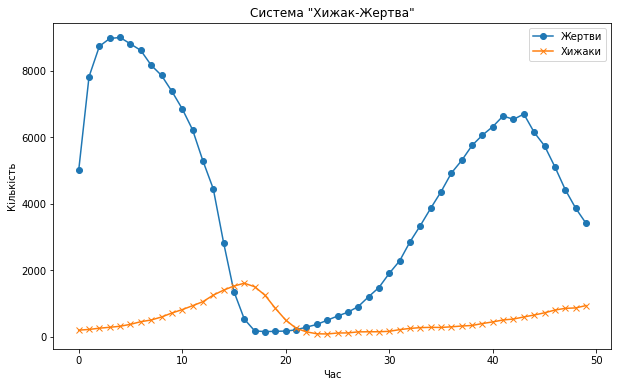

In [68]:
import random
import matplotlib.pyplot as plt

# Параметри системи
grid_size_x = 100
grid_size_y = 100
initial_fish_count = 5000
fish_reproduction_age = 3
fish_reproduction_period = 3
initial_predator_count = 200
predator_reproduction_age = 9
predator_reproduction_period = 9
predator_starvation_period = 4

time = []  # Періоди часу
_prey = []  # Кількість жертв
_predator = []  # Кількість хижаків


# Створення сітки для ставка
pond = [[None for _ in range(grid_size_x)] for _ in range(grid_size_y)]
num_rows = len(pond)
num_columns = len(pond[0])

def find_free_cells(x, y):
    neighbor_cells = [
        (x+1, y), (x-1, y), (x, y+1), (x, y-1), (x+1, y+1), (x-1, y+1), (x+1, y-1), (x-1, y-1)
    ]

    free_neighbor_cells = []

    for nx, ny in neighbor_cells:
        next_x_options = {-1: grid_size_x - 1, grid_size_x: 0}
        next_y_options = {-1: grid_size_y - 1, grid_size_y: 0}
        nx = next_x_options.get(nx, nx)
        ny = next_y_options.get(ny, ny)
        if pond[ny][nx] == None:
            free_neighbor_cells.append((nx, ny))
    return free_neighbor_cells

def place_fish_and_predators():
    # Створення та розміщення риб (агент 1)
    for _ in range(initial_fish_count):
        while True:
            x, y = random.randint(0, grid_size_x - 1), random.randint(0, grid_size_y - 1)
            if pond[y][x] is None:
                fish = {
                    'age': random.randint(0, fish_reproduction_age),
                    'code': 0
                }
                pond[y][x] = fish
                break

    # Створення та розміщення хижаків (агент 2)
    for _ in range(initial_predator_count):
        while True:
            x, y = random.randint(0, grid_size_x - 1), random.randint(0, grid_size_y - 1)
            if pond[y][x] is None:
                predator = {
                    'age':  random.randint(0, predator_reproduction_age),
                    'starvation_count': 0,
                    'code': 1
                }
                pond[y][x] = predator
                break

#той самий код, що й для перевірки розмноження риб, для перевірки                

def evolve():
    fish__count = 0
    predator__count = 0
    for y in range(grid_size_y):
        for x in range(grid_size_x):
            if pond[y][x]!=None and pond[y][x]['code']==0:
                fish__count +=1
            if pond[y][x]!=None and pond[y][x]['code']==1:
                predator__count +=1
            
    _prey.append(fish__count)
    _predator.append(predator__count)
    
    # Рух карасів
    for y in range(grid_size_y):
        for x in range(grid_size_x):
            if pond[y][x] != None and pond[y][x]['code'] == 0:  
                free_neighbor_cells = find_free_cells(x, y)
                if free_neighbor_cells:
                    random_neighbor = random.choice(free_neighbor_cells)
                    next_x, next_y = random_neighbor
                    pond[next_y][next_x] = pond[y][x]
                    pond[y][x] = None
                    pond[next_y][next_x]['age'] += 1###############################################
                else:
                    pond[y][x]['age']+=1

    # Розмноження карасів
    for y in range(grid_size_y):
        for x in range(grid_size_x):
            if pond[y][x] != None and pond[y][x]['code'] == 0 and (pond[y][x]['age'] - fish_reproduction_age) % fish_reproduction_period == 0:
                free_neighbor_cells = find_free_cells(x, y)
                if free_neighbor_cells:
                    random_neighbor = random.choice(free_neighbor_cells)
                    next_x, next_y = random_neighbor
                    fish = {
                        'age': 0,
                        'code': 0
                    }
                    pond[next_y][next_x] = fish
    
    #Рух щук
    for y in range(grid_size_y):
        for x in range(grid_size_x):
            if pond[y][x] != None and pond[y][x]['code'] == 1:
                #Голод
                if pond[y][x]['starvation_count'] == predator_starvation_period:
                    pond[y][x] = None
                    continue
                    
                #Полювання
                neighbor_cells = [
                    (x+1, y), (x-1, y), (x, y+1), (x, y-1), (x+1, y+1), (x-1, y+1), (x+1, y-1), (x-1, y-1)
                ]

                fish_cells = []

                for nx, ny in neighbor_cells:
                    next_x_options = {-1: grid_size_x - 1, grid_size_x: 0}
                    next_y_options = {-1: grid_size_y - 1, grid_size_y: 0}
                    nx = next_x_options.get(nx, nx)
                    ny = next_y_options.get(ny, ny)
                    if pond[ny][nx] != None and pond[ny][nx]['code'] == 0:
                        fish_cells.append((nx, ny))
                        
                if fish_cells:
                    random_fish = random.choice(fish_cells)
                    next_x, next_y = random_fish
                    pond[next_y][next_x] = pond[y][x]
                    pond[y][x] = None
                    pond[next_y][next_x]['starvation_count'] = 0
                else: 
                    free_neighbor_cells = find_free_cells(x, y)
                    if free_neighbor_cells:
                        random_neighbor = random.choice(free_neighbor_cells)
                        next_x, next_y = random_neighbor
                        pond[next_y][next_x] = pond[y][x]
                        pond[y][x] = None
                    pond[next_y][next_x]['starvation_count'] += 1
                pond[next_y][next_x]['age'] += 1
                    

    # Розмноження щук
    for y in range(grid_size_y):
        for x in range(grid_size_x):
            if pond[y][x] != None and pond[y][x]['code'] == 1 and (pond[y][x]['age'] - predator_reproduction_age) % predator_reproduction_period == 0:
                free_neighbor_cells = find_free_cells(x, y)
                if free_neighbor_cells:
                    random_neighbor = random.choice(free_neighbor_cells)
                    next_x, next_y = random_neighbor
                    predator = {
                        'age': 0,
                        'starvation_count': 0,
                        'code': 1
                    }
                    pond[next_y][next_x] = predator
                    
place_fish_and_predators()

fish__count = 0
predator__count = 0

for y in range(grid_size_y):
    for x in range(grid_size_x):
        if pond[y][x]!=None and pond[y][x]['code']==0:
            fish__count +=1
        if pond[y][x]!=None and pond[y][x]['code']==1:
            predator__count +=1
print (f"fish count: {fish__count}")
print (f"predator count: {predator__count}")

# # Розмноження карасів
# for y in range(grid_size_y):
#     for x in range(grid_size_x):
#         if pond[y][x] != None and pond[y][x]['code'] == 0 and (pond[y][x]['age'] - fish_reproduction_age) % fish_reproduction_period == 0:
#             free_neighbor_cells = find_free_cells(x, y)
#             if free_neighbor_cells:
#                 random_neighbor = random.choice(free_neighbor_cells)
#                 next_x, next_y = random_neighbor
#                 fish = {
#                     'age': 0,
#                     'code': 0
#                 }
#                 pond[next_y][next_x] = fish

# # Розмноження щук
# for y in range(grid_size_y):
#     for x in range(grid_size_x):
#         if pond[y][x] != None and pond[y][x]['code'] == 1 and (pond[y][x]['age'] - predator_reproduction_age) % predator_reproduction_period == 0:
#             free_neighbor_cells = find_free_cells(x, y)
#             if free_neighbor_cells:
#                 random_neighbor = random.choice(free_neighbor_cells)
#                 next_x, next_y = random_neighbor
#                 predator = {
#                     'age': 0,
#                     'starvation_count': 0,
#                     'code': 1
#                 }
#                 pond[next_y][next_x] = predator

for x in range(50):
    time.append(x)
    evolve()

fish__count = 0
predator__count = 0

for y in range(grid_size_y):
    for x in range(grid_size_x):
        if pond[y][x]!=None and pond[y][x]['code']==0:
            fish__count +=1
        if pond[y][x]!=None and pond[y][x]['code']==1:
            predator__count +=1
print (f"fish count: {fish__count}")
print (f"predator count: {predator__count}")    


# Створення графіку
plt.figure(figsize=(10, 6))
plt.plot(time, _prey, label='Жертви', marker='o')
plt.plot(time, _predator, label='Хижаки', marker='x')

# Налаштування графіку
plt.xlabel('Час')
plt.ylabel('Кількість')
plt.title('Система "Хижак-Жертва"')
plt.legend()

# Відображення графіку
plt.show()

In [20]:
random.randint(0, grid_size_x - 1)

10